In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
import scipy as sp
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline
import VersionZeroPointZero as PSS
from scipy import signal

ModuleNotFoundError: No module named 'VersionZeroPointZero'

In [ ]:
rcParams['figure.figsize'] = (8.0,5.0)
rcParams.update({'font.size': 14})

In [3]:
S1=PSS.Signal(Nt=2000)

NameError: name 'PSS' is not defined

In [390]:
P1=PSS.Pulsar(S1)

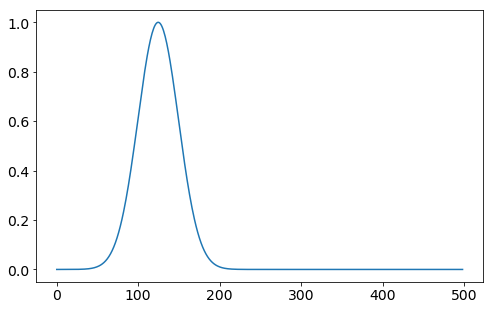

In [391]:
plot(P1.profile)

In [392]:
P1.gauss_template_beta()

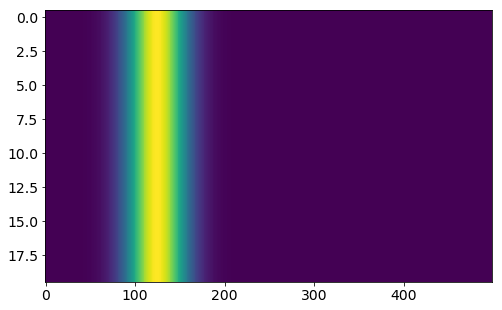

In [393]:
imshow(P1.profile,aspect='auto')

In [394]:
peak = [.35,.2,.4]
width = [.02,.03,.09]
amp = [1,2,3]
P1.gauss_template_beta(peak=peak,width=width,amp=amp)

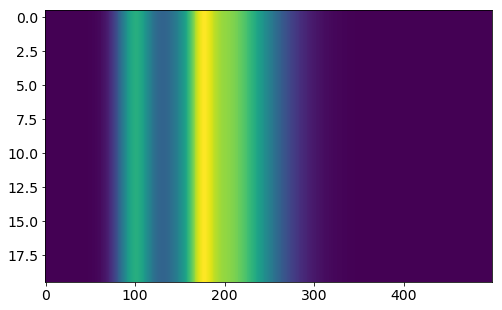

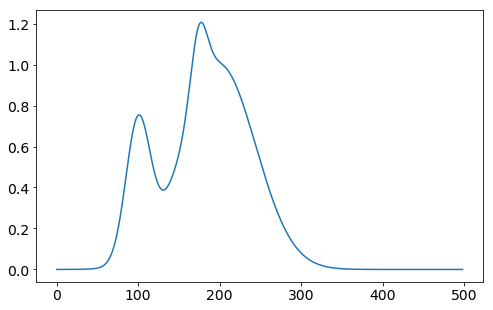

In [395]:
imshow(P1.profile,aspect='auto')
show()
plot(P1.profile[3,:])
show()

In [396]:
P1.nBinsPeriod

499

In [397]:
peak2 = np.arange(20)*0.01 + 0.2
width2 = np.arange(20)*0.002 +0.002
amp2 = np.ones(20)
peak2

array([ 0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,  0.28,
        0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,  0.37,
        0.38,  0.39])

In [398]:
peak2.resize(20,1)
width2.resize(20,1)
amp2.resize(20,1)
peak2

array([[ 0.2 ],
       [ 0.21],
       [ 0.22],
       [ 0.23],
       [ 0.24],
       [ 0.25],
       [ 0.26],
       [ 0.27],
       [ 0.28],
       [ 0.29],
       [ 0.3 ],
       [ 0.31],
       [ 0.32],
       [ 0.33],
       [ 0.34],
       [ 0.35],
       [ 0.36],
       [ 0.37],
       [ 0.38],
       [ 0.39]])

In [399]:
P1.gauss_template_beta(peak=peak2,width=width2,amp=amp2)

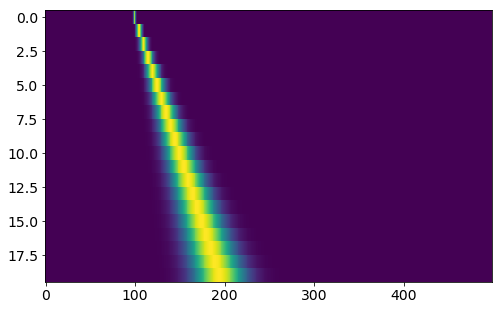

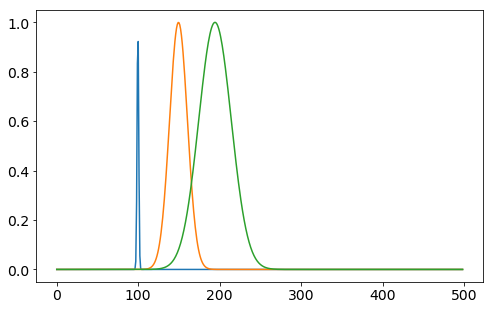

In [400]:
imshow(P1.profile,aspect='auto')
show()
plot(P1.profile[0,:])
plot(P1.profile[10,:])
plot(P1.profile[19,:])
show()

In [401]:
peak3 = np.random.randn(20*3)*0.01 + 0.2
width3 = abs(np.random.randn(20*3)*0.002 +0.012)
amp3 = np.random.randn(20*3)**2
peak3.resize(20,3)
width3.resize(20,3)
amp3.resize(20,3)
peak3

array([[ 0.21466876,  0.19613381,  0.20669951],
       [ 0.18575127,  0.19897132,  0.19552034],
       [ 0.20671321,  0.20307038,  0.18194068],
       [ 0.19939655,  0.20426654,  0.18688884],
       [ 0.21407847,  0.21455807,  0.19624744],
       [ 0.18827053,  0.21183901,  0.20112743],
       [ 0.20346303,  0.19898883,  0.20287919],
       [ 0.19808754,  0.21007054,  0.19936932],
       [ 0.1880892 ,  0.21202385,  0.19507084],
       [ 0.19288922,  0.19737994,  0.20522002],
       [ 0.20459705,  0.19272661,  0.17950178],
       [ 0.19576302,  0.20472964,  0.21407829],
       [ 0.18731706,  0.18718991,  0.19076578],
       [ 0.19464606,  0.18491071,  0.20794075],
       [ 0.19749574,  0.21109948,  0.20465193],
       [ 0.19954443,  0.18270814,  0.2088961 ],
       [ 0.20255603,  0.20384511,  0.19668606],
       [ 0.2040789 ,  0.18997773,  0.20527015],
       [ 0.19343512,  0.19176774,  0.18176379],
       [ 0.20839098,  0.18326761,  0.20325415]])

In [402]:
P1.gauss_template_beta(peak=peak3,width=width3,amp=amp3)

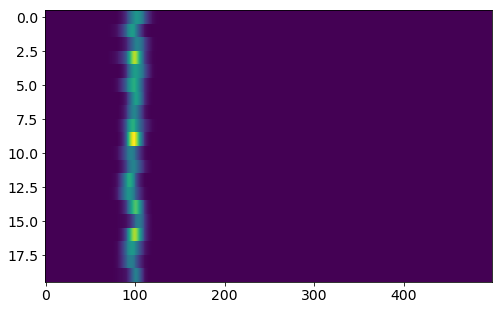

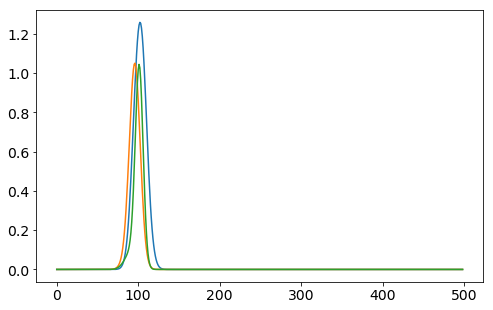

In [403]:
imshow(P1.profile,aspect='auto')
show()
plot(P1.profile[0,:])
plot(P1.profile[10,:])
plot(P1.profile[19,:])
show()

In [404]:
P1.make_pulses_beta()

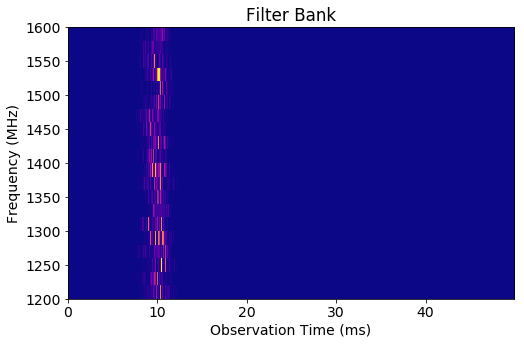

In [405]:
S1.filter_bank()

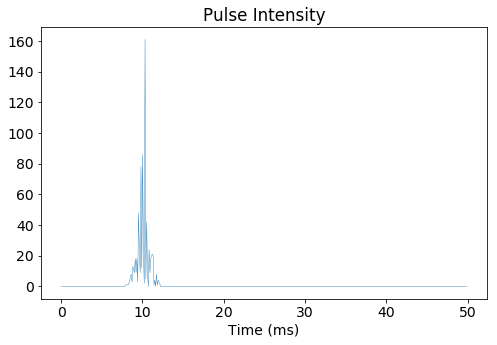

In [406]:
S1.pulse_plot()

In [407]:
peak_shape = np.array(peak)
peak_shape.shape

(3,)

In [408]:
peak2.shape

(20, 1)

In [409]:
peak3.shape

(20, 3)

# Let's Convolve Things

In [410]:
top_hat = signal.boxcar(100)/100
a=np.max(top_hat)
print(a)

0.01


Add some noise

(0, 250)

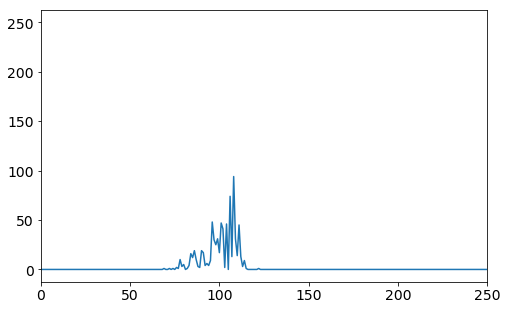

In [411]:
noisy_gauss=(P1.profile[3,:])*(np.random.normal(1.1,0.3,499)**2)
#noisy_tophat=top_hat*(np.random.normal(0,1,400)**2)
#plt.plot(top_hat)
plt.plot(S1.signal[3,:])
plt.xlim(0,250)

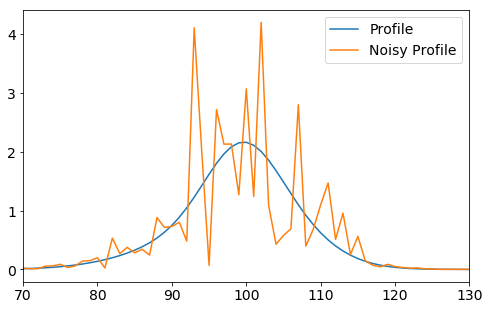

In [412]:
plt.plot(P1.profile[3,:], label="Profile")
plt.plot(noisy_gauss, label="Noisy Profile")
plt.xlim(70,130)
plt.legend()

In [413]:
convolved_gauss=3*np.convolve(top_hat,P1.profile[3,:],'same')
convolved_noisy_gauss=convolved_gauss*np.random.normal(1.1,0.3,499)
print(min((np.random.normal(1.1,0.3,499))))

0.192828452479


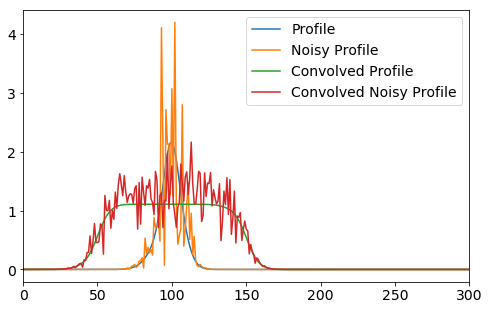

In [414]:
plt.plot(P1.profile[3,:], label="Profile")
plt.plot(noisy_gauss, label="Noisy Profile")
plt.plot(convolved_gauss,label="Convolved Profile")
plt.plot(convolved_noisy_gauss, label="Convolved Noisy Profile")
plt.xlim(0,300)
plt.legend()

In [ ]:
convolved_gauss=3*np.convolve(np.random.normal(1.1,0.3,499),P1.profile[3,:],'same')

Trying To Use Just Simulator Things

2000

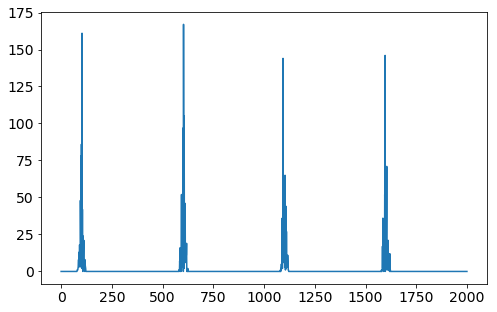

In [440]:
plt.plot(P1.signal[0])


In [470]:
top_hat = signal.boxcar(100)/100
convolved_gauss=6*np.convolve(top_hat,P1.signal[0],'same')

(0, 250)

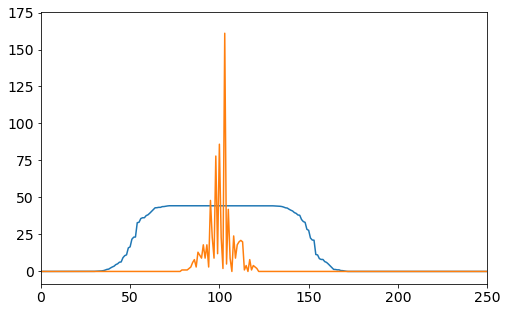

In [471]:
plt.plot(convolved_gauss)
plt.plot(P1.signal[0])
plt.xlim(0,250)

In [472]:
disperse()

NameError: name 'disperse' is not defined

In [477]:
ISM.disperse()

NameError: name 'ISM' is not defined